In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import joblib
from easymoney.money import EasyPeasy

In [2]:
df1 = pd.read_csv("AT_2012p_EUSILC.csv")
df2 = pd.read_csv("AT_2013p_EUSILC.csv")
df3 = pd.read_csv("BE_2012p_EUSILC.csv")
df4 = pd.read_csv("BE_2013p_EUSILC.csv")
df5 = pd.read_csv("CY_2012p_EUSILC.csv")
df6 = pd.read_csv("CY_2013p_EUSILC.csv")
df7 = pd.read_csv("DE_2012p_EUSILC.csv")
df8 = pd.read_csv("DE_2013p_EUSILC.csv")
df9 = pd.read_csv("EE_2012p_EUSILC.csv")
df10 = pd.read_csv("EE_2013p_EUSILC.csv")
df11 = pd.read_csv("EL_2012p_EUSILC.csv")
df12 = pd.read_csv("EL_2013p_EUSILC.csv")
df13 = pd.read_csv("ES_2012p_EUSILC.csv")
df14 = pd.read_csv("ES_2013p_EUSILC.csv")
df15 = pd.read_csv("FI_2012p_EUSILC.csv")
df16 = pd.read_csv("FI_2013p_EUSILC.csv")
df17 = pd.read_csv("FR_2012p_EUSILC.csv", low_memory=False)
df17["PY010G"] = df17["PY010G"].str.replace(',', '.').astype('float')
df18 = pd.read_csv("FR_2013p_EUSILC.csv", low_memory=False)
df18["PY010G"] = df18["PY010G"].str.replace(',', '.').astype('float')
df19 = pd.read_csv("IE_2012p_EUSILC.csv")
df20 = pd.read_csv("IE_2013p_EUSILC.csv")
df21 = pd.read_csv("IT_2012p_EUSILC.csv")
df22 = pd.read_csv("IT_2013p_EUSILC.csv")
df23 = pd.read_csv("LU_2012p_EUSILC.csv")
df24 = pd.read_csv("LU_2013p_EUSILC.csv")
df25 = pd.read_csv("MT_2012p_EUSILC.csv")
df26 = pd.read_csv("MT_2013p_EUSILC.csv")
df27 = pd.read_csv("NL_2012p_EUSILC.csv")
df28 = pd.read_csv("NL_2013p_EUSILC.csv")
df29 = pd.read_csv("SI_2012p_EUSILC.csv")
df30 = pd.read_csv("SI_2013p_EUSILC.csv")
df31 = pd.read_csv("SK_2012p_EUSILC.csv")
df32 = pd.read_csv("SK_2013p_EUSILC.csv")

In [3]:
dfwage = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32], ignore_index=True, sort=False)
dfwage = dfwage.dropna(axis=1,how='all')
dfwage = dfwage.replace('NA', np.nan)
dfwage = dfwage.replace('NAs', np.nan)

In [4]:
dfwage.head()

,PB010,PB020,PB030,PB040,PB060,PB100,PB110,PB120,PB130,PB140,...,PW005,PY020N,PY035N,PY031G,PX010,PX020,PX030,PX040,PX050,PX200
0,2012,AT,29301.0,549.884615,NaN,4.0,2012.0,10.0,3.0,1972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,AT,52101.0,549.884615,NaN,5.0,2012.0,26.0,6.0,1931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,AT,168201.0,549.884615,NaN,6.0,2012.0,15.0,3.0,1952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,AT,296001.0,549.884615,NaN,4.0,2012.0,12.0,1.0,1947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,AT,315201.0,549.884615,NaN,6.0,2012.0,9.0,1.0,1958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfwage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585693 entries, 0 to 585692
Data columns (total 97 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PB010   585693 non-null  int64  
 1   PB020   585693 non-null  object 
 2   PB030   585693 non-null  float64
 3   PB040   585693 non-null  object 
 4   PB060   63328 non-null   float64
 5   PB100   585018 non-null  float64
 6   PB110   585355 non-null  float64
 7   PB120   494965 non-null  float64
 8   PB130   420836 non-null  float64
 9   PB140   585693 non-null  int64  
 10  PB150   585693 non-null  int64  
 11  PB190   579156 non-null  float64
 12  PB200   584733 non-null  float64
 13  PB220A  535739 non-null  object 
 14  PE010   584183 non-null  float64
 15  PE020   67472 non-null   float64
 16  PE040   570281 non-null  object 
 17  PL031   579170 non-null  float64
 18  PL035   191111 non-null  float64
 19  PL015   306673 non-null  float64
 20  PL020   262976 non-null  float64
 21  PL025   43

In [6]:
dfwage.describe()

,PB010,PB030,PB060,PB100,PB110,PB120,PB130,PB140,PB150,PB190,...,PW005,PY020N,PY035N,PY031G,PX010,PX020,PX030,PX040,PX050,PX200
count,585693.000000,5.856930e+05,63328.000000,585018.000000,585355.000000,494965.000000,420836.000000,585693.000000,585693.000000,579156.000000,...,10143.000000,358766.000000,358766.000000,444389.000000,358766.0,358766.000000,358766.000000,358766.0,355458.000000,137843.000000
mean,2012.455250,3.846202e+07,976.621263,2.404023,2012.473866,14.204146,2.680215,1965.069221,1.513264,1.981093,...,952.171148,96.172840,92.707010,33.669168,1.0,45.832891,76587.622690,1.0,4.388943,1350.417550
std,0.497994,8.033218e+07,1912.640825,1.061591,0.499317,11.734654,1.618822,18.174344,0.499824,1.079374,...,889.539377,629.693599,1312.437285,414.554918,0.0,18.165508,108688.735138,0.0,2.152243,1962.150980
min,2012.000000,1.104100e+01,1.000000,1.000000,2012.000000,1.000000,1.000000,1931.000000,1.000000,1.000000,...,42.261862,0.000000,0.000000,0.000000,1.0,16.000000,1.000000,1.0,2.000000,5.776066
25%,2012.000000,2.545210e+05,2.000000,2.000000,2012.000000,7.000000,2.000000,1951.000000,1.000000,1.000000,...,463.639394,0.000000,0.000000,0.000000,1.0,31.000000,1352.000000,1.0,2.000000,180.502000
50%,2012.000000,1.067202e+06,504.906150,2.000000,2012.000000,11.000000,3.000000,1966.000000,2.000000,2.000000,...,661.124707,0.000000,0.000000,1.000000,1.0,44.000000,37144.000000,1.0,5.000000,638.244676
75%,2013.000000,3.185180e+07,1023.616000,3.000000,2013.000000,18.000000,4.000000,1980.000000,2.000000,2.000000,...,1069.895996,1.000000,1.000000,1.000000,1.0,60.000000,81821.750000,1.0,7.000000,1721.673886
max,2013.000000,4.011008e+08,31384.050000,8.000000,2013.000000,90.000000,12.000000,1996.000000,2.000000,5.000000,...,5864.685037,120000.000000,180792.000000,67179.000000,1.0,80.000000,511083.000000,1.0,8.000000,27777.865980


IT    125082
ES     53865
DE     44845
SI     44096
FR     41527
FI     36781
NL     36335
EL     29126
SK     26447
AT     23343
BE     22446
CY     21563
EE     21058
MT     19821
IE     19748
LU     19610
Name: PB020, dtype: int64


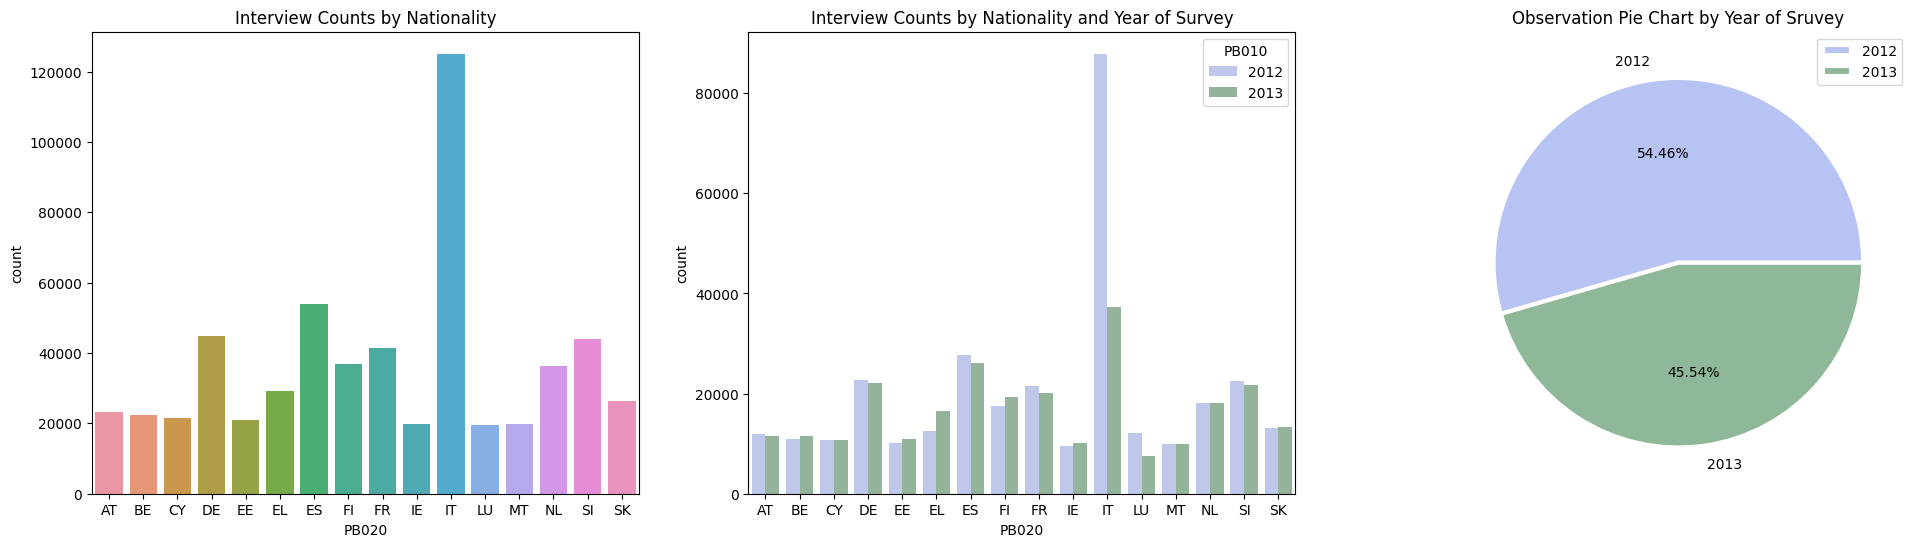

In [7]:
dfwage['PB020'].value_counts()
fig, ax = plt.subplots(1,3,figsize=(24,6))
sns.countplot(ax=ax[0],data=print(dfwage['PB020'].value_counts()), x=dfwage['PB020']).set( title="Interview Counts by Nationality")
labels = ['2012','2013']
dfwage['PB010G'] = pd.cut(dfwage['PB010'],
                   (0,2012.5,2100), 
                   labels=labels)
colors = ['#B7C3F3', '#8EB897']
plt.pie(dfwage.groupby(['PB010G'])['PB010'].sum(), labels=labels, autopct='%1.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.title("Observation Pie Chart by Year of Sruvey")
sns.countplot(ax=ax[1],data=dfwage, x=dfwage["PB020"],hue="PB010",palette=['#B7C3F3', '#8EB897']).set( title="Interview Counts by Nationality and Year of Survey")
plt.legend(['2012', '2013'])

In [8]:
## data manipulation and clearance 
## establish variables from others

## replace to make 

## drop rows with null and inappropriate values of essential variables which will be included in the model

## PL060 is average working hours per week, any null and 0 and below values of PL060 should disqualify the use of the interview, thus lead to a drop of row
## extra dummy variable FULL created from PL060, FULL = 1 means full-time worker if PL060 > 36, and FULL = 0 means part-time if not
dfwage = dfwage.dropna(axis=0, subset=['PL060'])
dfwage.drop(dfwage[dfwage['PL060'] <= 0].index, inplace = True)
dfwage["PL060"] = dfwage['PL060'].astype('int')
dfwage['FULL'] = (dfwage.PL060 >= 36.).astype('int')

## PB110 is the year when interveiw conducted, PB140 is the year of birth of the interviewee, from here we can work out AGE variable and drop any observations with null values in either
dfwage = dfwage.dropna(axis=0, subset=['PB110'])
dfwage["PB110"] = dfwage['PB110'].astype('int')
dfwage = dfwage.dropna(axis=0, subset=['PB140'])
dfwage['AGE'] = (dfwage['PB110'] - dfwage['PB140']).astype('int')
## moreover, we use the retirement age at the time as 63 years old to exclude retired people from the sample data
dfwage.drop(dfwage[dfwage['AGE'] >= 63].index, inplace = True)

## We look at mainly employee with a valid contract, so PL040 which indicates type of work will help us to exclude self-employement (1 and 2) and home worker (4), we will not use any observation without PL040 information
dfwage = dfwage.dropna(axis=0, subset=['PL040'])
dfwage["PL040"] = dfwage['PL040'].astype('int')
dfwage.drop(dfwage[dfwage['PL040'] == 1].index, inplace = True)
dfwage.drop(dfwage[dfwage['PL040'] == 2].index, inplace = True)
dfwage.drop(dfwage[dfwage['PL040'] == 4].index, inplace = True)

## eliminating observations with null general health, long-term condition dummy, marriage dummy, sex dummy and highest education attainment values
dfwage = dfwage.dropna(axis=0, subset=['PH010'])
dfwage["PH010"] = dfwage['PH010'].astype('int')

dfwage = dfwage.dropna(axis=0, subset=['PH020'])
dfwage["PH020"] = dfwage['PH020'].astype('int')
dfwage.drop(dfwage[dfwage['PH020'] == 8].index, inplace = True)
dfwage['PH020'] = dfwage['PH020'].replace(2,0)

dfwage = dfwage.dropna(axis=0, subset=['PB190'])
dfwage["PB190"] = dfwage['PB190'].astype('int')
dfwage['MARRIED'] = (dfwage.PB190 == 2).astype('int')

dfwage = dfwage.dropna(axis=0, subset=['PB150'])
dfwage["PB150"] = dfwage['PB150'].astype('int')
dfwage['PB150'] = dfwage['PB150'].replace(2,0)

dfwage = dfwage.dropna(axis=0, subset=['PE040'])
dfwage.drop(dfwage[dfwage['PE040'] == '0-1'].index, inplace = True)
dfwage["PE040"] = dfwage['PE040'].astype('int')
dfwage['PE040'] = dfwage['PE040'].replace(6,7)
dfwage['PE040'] = dfwage['PE040'].replace(5,6)
dfwage['PE040'] = dfwage['PE040'].replace(4,5)
dfwage['PE040'] = dfwage['PE040'].replace(3,4)
dfwage['PE040'] = dfwage['PE040'].replace(2,3)
dfwage['PE040'] = dfwage['PE040'].replace(1,2)
dfwage['PE040'] = dfwage['PE040'].replace(0,1)

## work out the dependent variable as hourly wage
dfwage["PY010G"] = dfwage['PY010G'].astype('float')
dfwage["PY020G"] = dfwage['PY020G'].astype('float')
dfwage["PY030G"] = dfwage['PY030G'].astype('float')
dfwage = dfwage.dropna(axis=0, subset=['PY010G'])
dfwage = dfwage.dropna(axis=0, subset=['PY020G'])
dfwage = dfwage.dropna(axis=0, subset=['PY030G'])
dfwage['HOURLY'] = ((dfwage['PY010G'] + dfwage['PY020G'] + dfwage['PY030G'])/dfwage['PL060']/52).astype('float')
dfwage.drop(dfwage[dfwage['HOURLY'] <= 0].index, inplace = True)
dfwage['HOURLY'].describe()

count    111776.000000
mean         15.226966
std          18.286867
min           0.000321
25%           6.093464
50%          11.995808
75%          19.648257
max        2430.326923
Name: HOURLY, dtype: float64

IT    22112
FR    11482
ES    11425
SK     7961
AT     7057
BE     6769
CY     6713
LU     6664
EE     5932
MT     5781
IE     4976
NL     3938
FI     3826
SI     3683
EL     3457
Name: PB020, dtype: int64


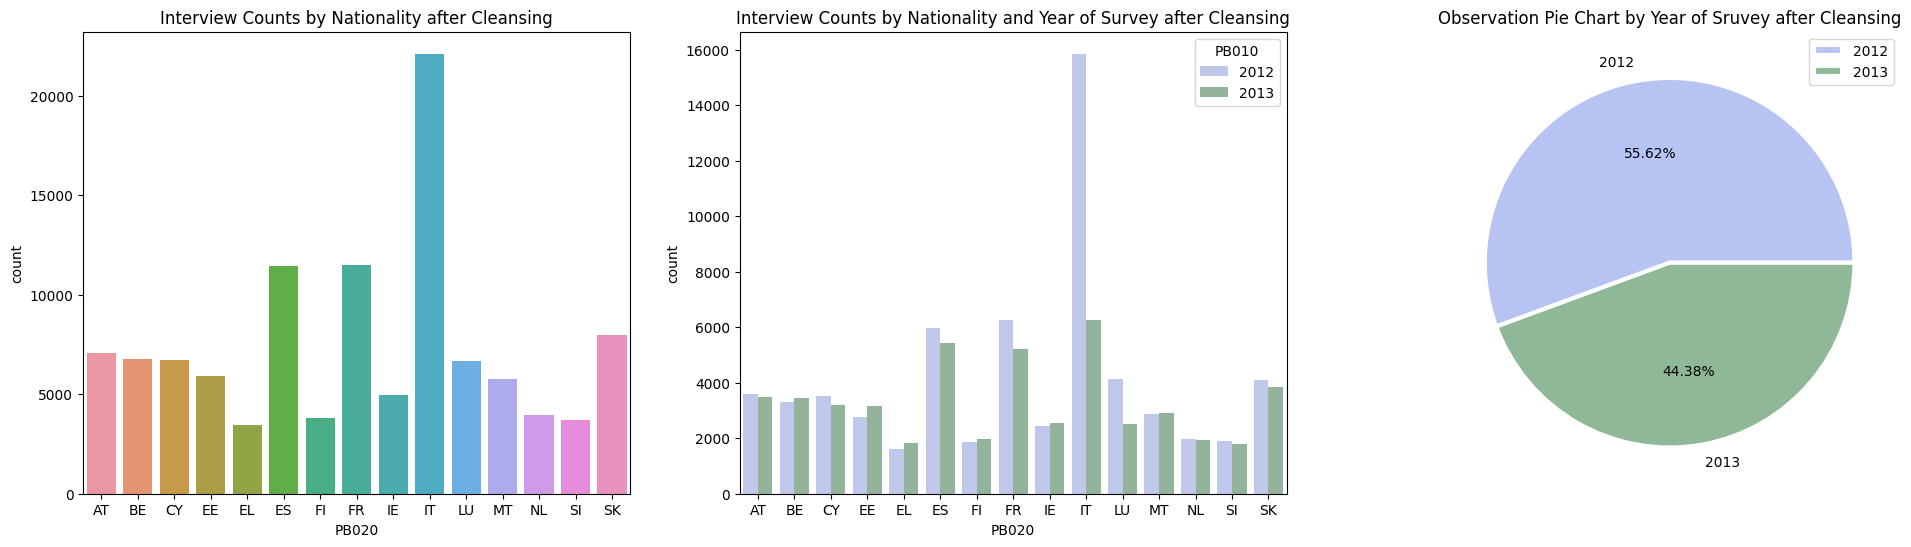

In [9]:
dfwage['PB020'].value_counts()
fig, ax = plt.subplots(1,3,figsize=(24,6))
sns.countplot(ax=ax[0],data=print(dfwage['PB020'].value_counts()), x=dfwage['PB020']).set( title="Interview Counts by Nationality after Cleansing")
labels = ['2012','2013']
dfwage['PB010G'] = pd.cut(dfwage['PB010'],
                   (0,2012.5,2100), 
                   labels=labels)
colors = ['#B7C3F3', '#8EB897']
plt.pie(dfwage.groupby(['PB010G'])['PB010'].sum(), labels=labels, autopct='%1.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.title("Observation Pie Chart by Year of Sruvey after Cleansing")
sns.countplot(ax=ax[1],data=dfwage, x=dfwage["PB020"],hue="PB010",palette=['#B7C3F3', '#8EB897']).set( title="Interview Counts by Nationality and Year of Survey after Cleansing")
plt.legend(['2012', '2013'])

In [10]:
## Easy Money
ep = EasyPeasy()
print(ep.normalize(amount=1000000, region="AT", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="AT", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="BE", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="BE", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="CY", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="CY", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="EE", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="EE", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="GREECE", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="GREECE", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="ES", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="ES", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="FI", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="FI", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)


1.16198635
1.1392005600000001
1.13510507
1.12260936
0.98667654
0.99063271
1.16631018
1.1347575
0.97166165
0.98069651
1.07854691
1.0635657299999999
1.0828562099999999
1.06708169


In [11]:
print(ep.normalize(amount=1000000, region="FR", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="FR", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="IE", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="IE", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="IT", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="IT", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="LU", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="LU", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="MT", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="MT", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="NL", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="NL", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="SI", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="SI", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="SK", from_year=2012, to_year="latest", base_currency="EUR") / 1000000)
print(ep.normalize(amount=1000000, region="SK", from_year=2013, to_year="latest", base_currency="EUR") / 1000000)

1.0795514099999999
1.070307
1.0425319
1.03725523
1.0626465900000002
1.04983863
1.1205599
1.10146014
1.09940276
1.08657805
1.14944204
1.1213313999999999
1.08301635
1.06418871
1.12640305
1.11084594


In [12]:
## create INDEX column
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "AT"), 1.16198635, 0 )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "AT"), 1.13920056, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "BE"), 1.13510507, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "BE"), 1.12260936, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "CY"), 0.98667654, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "CY"), 0.99063271, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "EE"), 1.16631018, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "EE"), 1.13475750, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "EL"), 0.97166165, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "EL"), 0.98069651, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "ES"), 1.07854691, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "ES"), 1.06356573, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "FI"), 1.08285621, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "FI"), 1.06708169, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "FR"), 1.07955141, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "FR"), 1.07030700, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "IE"), 1.04253190, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "IE"), 1.03725523, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "IT"), 1.06264659, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "IT"), 1.04983863, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "LU"), 1.12055990, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "LU"), 1.10146014, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "MT"), 1.09940276, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "MT"), 1.08657805, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "NL"), 1.14944204, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "NL"), 1.12133140, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "SI"), 1.08301635, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "SI"), 1.06418871, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2012) &  (dfwage.PB020 == "SK"), 1.12640305, dfwage['INDEX'] )
dfwage['INDEX'] = np.where((dfwage.PB010 == 2013) &  (dfwage.PB020 == "SK"), 1.11084594, dfwage['INDEX'] )


count    111776.000000
mean         16.501728
std          19.767298
min           0.000356
25%           6.595990
50%          12.848627
75%          21.260677
max        2533.693345
Name: ADJ_HOURLY, dtype: float64

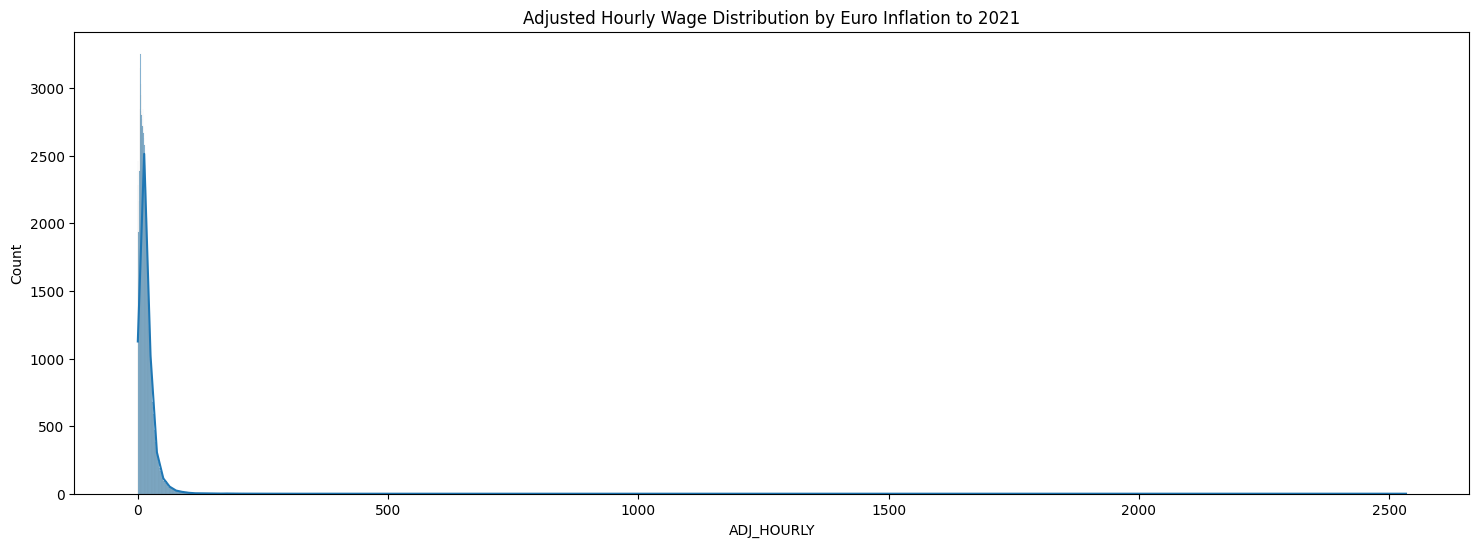

In [13]:
## Create adjusted hourly wage by exchange rate and inflation rate to current value in 2021 Euro
dfwage['ADJ_HOURLY'] = dfwage['HOURLY'] * dfwage['INDEX']
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot( data=dfwage, x=dfwage["ADJ_HOURLY"],kde=True).set( title="Adjusted Hourly Wage Distribution by Euro Inflation to 2021")
dfwage['ADJ_HOURLY'].describe()

<AxesSubplot: xlabel='AGE'>

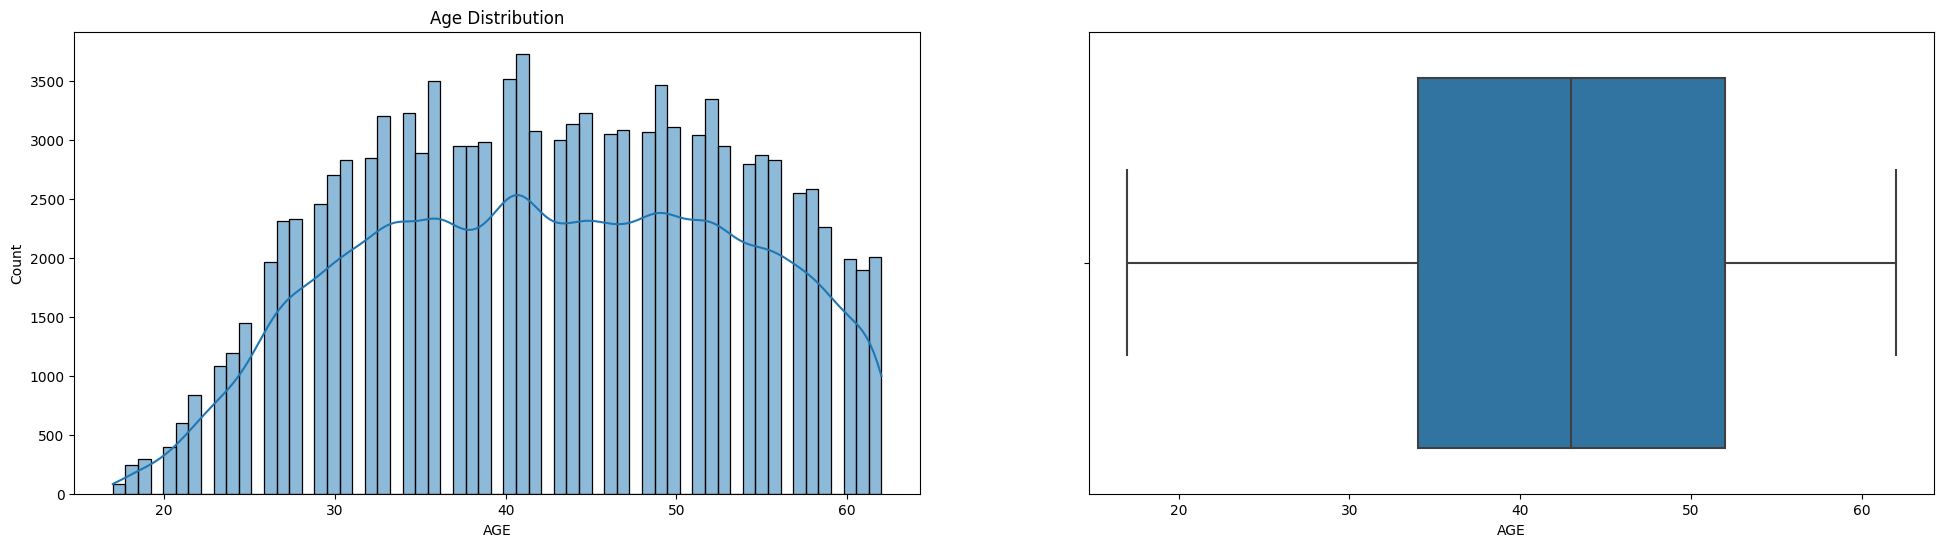

In [14]:
## Age
fig, ax = plt.subplots(1,2,figsize=(24,6))
sns.histplot(ax=ax[0], data=dfwage, x=dfwage["AGE"],kde=True).set( title="Age Distribution")
sns.boxplot(ax=ax[1],x=dfwage["AGE"])

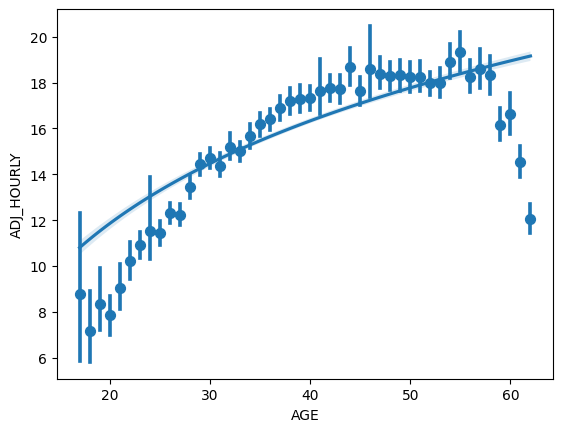

In [15]:
## finding out quadratic relation between age and adjusted hourly wage
sns.regplot(x = "AGE",
            y = "ADJ_HOURLY",
            data = dfwage,
            x_estimator=np.mean, logx=True, truncate=True)
dfwage['AGE2'] = dfwage["AGE"]**2

1    87821
0    23955
Name: FULL, dtype: int64


[Text(0.5, 1.0, 'Employee Groups by Marriage')]

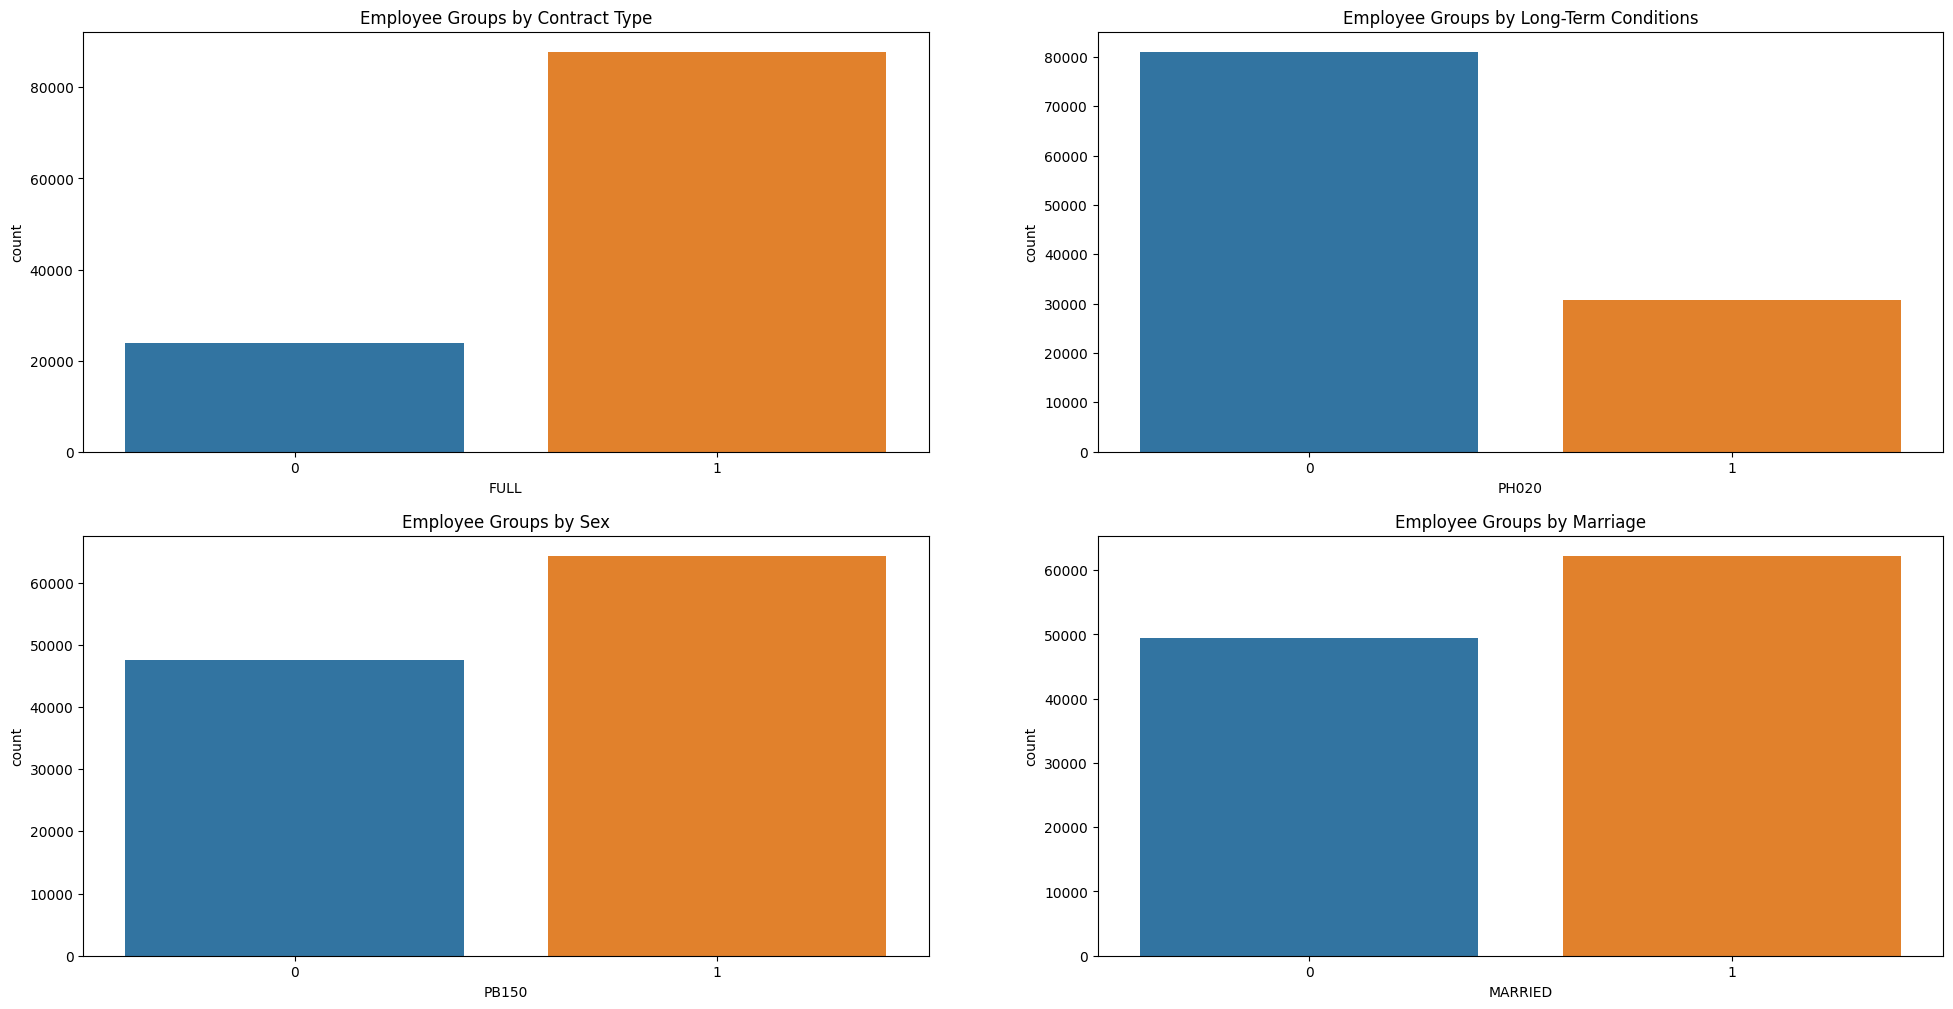

In [16]:
## Full-time
print(dfwage['FULL'].value_counts())
fig, ax = plt.subplots(2,2,figsize=(24,12))
sns.countplot(ax=ax[0,0], data=dfwage, x=dfwage["FULL"]).set( title="Employee Groups by Contract Type")
sns.countplot(ax=ax[0,1], data=dfwage, x=dfwage["PH020"]).set( title="Employee Groups by Long-Term Conditions")
sns.countplot(ax=ax[1,0], data=dfwage, x=dfwage["PB150"]).set( title="Employee Groups by Sex")
sns.countplot(ax=ax[1,1], data=dfwage, x=dfwage["MARRIED"]).set( title="Employee Groups by Marriage")

[Text(0.5, 1.0, 'Employee Groups by Highest Education Attainment')]

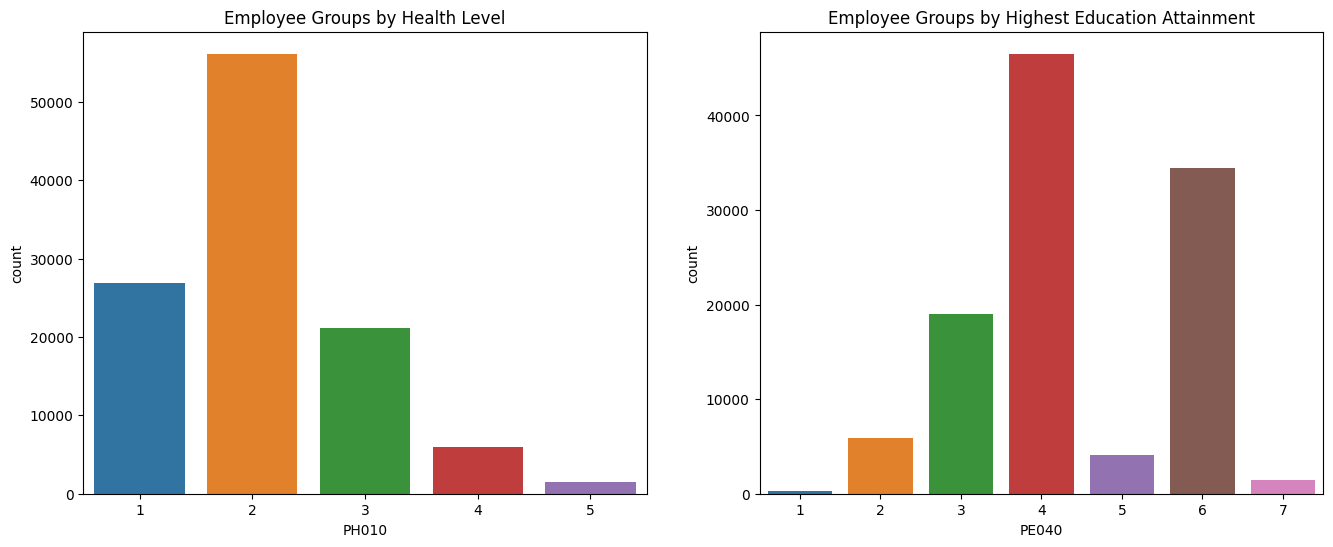

In [17]:
## education and health
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.countplot(ax=ax[0],data=dfwage, x=dfwage["PH010"]).set( title="Employee Groups by Health Level")
sns.countplot(ax=ax[1],data=dfwage, x=dfwage["PE040"]).set( title="Employee Groups by Highest Education Attainment")

In [18]:
dfwage = pd.get_dummies(dfwage, columns=["PB010","PB020"])

In [19]:
## corr matrix table
corr_matrix = dfwage.corr().loc[["ADJ_HOURLY"]]
corr_matrix

C:\Users\mmm\AppData\Local\Temp\ipykernel_876\4212018612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfwage.corr().loc[["ADJ_HOURLY"]]


,PB030,PB060,PB100,PB110,PB120,PB130,PB140,PB150,PB190,PB200,...,PB020_ES,PB020_FI,PB020_FR,PB020_IE,PB020_IT,PB020_LU,PB020_MT,PB020_NL,PB020_SI,PB020_SK
ADJ_HOURLY,0.057781,0.156961,0.036641,-0.003977,-0.016645,0.040714,-0.079266,0.072303,0.031195,-0.008111,...,-0.057617,0.049607,0.038759,0.090724,-0.034977,0.167662,-0.06221,0.102515,-0.050305,-0.158251


In [20]:
dfwage.to_csv('srt.csv')

In [21]:
cols = ["AGE","AGE2","FULL","MARRIED","PH010","PH020","PE040","PB150","PB020_AT","PB020_BE","PB020_CY","PB020_EE","PB020_EL","PB020_ES","PB020_FI","PB020_FR","PB020_IE","PB020_IT","PB020_LU","PB020_MT","PB020_NL", "PB020_SI","PB020_SK"]
y = dfwage['ADJ_HOURLY']
X = dfwage[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=114514)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
## Linear
lin_reg = LinearRegression().fit(X_train, y_train)
pred_lin = lin_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lin})

,Actual,Predicted
132383,0.082379,11.755318
11703,1.663093,22.717232
363874,12.422066,16.268746
193945,33.093257,21.695748
53953,5.544838,7.971138
...,...,...
262380,24.951859,21.784127
382041,9.059062,19.833687
119908,34.790808,10.799263
206301,27.416621,18.473580


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 8.356381437676001
MSE: 252.89589781506078
RMSE: 15.902700959744568
R2: 0.19099339906629131


In [24]:
## Lasso Regression 0.99
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
132383,0.082379,11.886844
11703,1.663093,16.543756
363874,12.422066,15.468663
193945,33.093257,19.329607
53953,5.544838,14.306813
...,...,...
262380,24.951859,16.382751
382041,9.059062,18.097619
119908,34.790808,11.235781
206301,27.416621,18.644605


In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 9.028839947693973
MSE: 272.0570235137572
RMSE: 16.4941511910664
R2: 0.12969751682583686


In [26]:
## Lasso Regression 0.95
model_lasso = Lasso(alpha=0.95)
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
132383,0.082379,11.791381
11703,1.663093,16.682721
363874,12.422066,15.421813
193945,33.093257,19.498085
53953,5.544838,14.152899
...,...,...
262380,24.951859,16.424943
382041,9.059062,18.128331
119908,34.790808,11.139548
206301,27.416621,18.695643


In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 8.984059170661311
MSE: 270.9372983936198
RMSE: 16.46017309731644
R2: 0.13327948482630214


In [28]:
## random foresst regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=114514)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
132383,0.082379,13.737053
11703,1.663093,17.879108
363874,12.422066,15.945209
193945,33.093257,13.406598
53953,5.544838,7.960688
...,...,...
262380,24.951859,17.420879
382041,9.059062,19.266597
119908,34.790808,7.927262
206301,27.416621,30.485950


In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 9.3997056035702
MSE: 326.263058632835
RMSE: 18.06275335138126
R2: -0.043706008500807636


In [30]:
## Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)


mul_reg = LinearRegression()
mul_reg.fit(X_train_2, y_train)
mul_pred = mul_reg.predict(X_test_2)
pd.DataFrame({'Actual': y_test, 'Predicted': mul_pred})

,Actual,Predicted
132383,0.082379,9.523438
11703,1.663093,24.567383
363874,12.422066,16.688477
193945,33.093257,24.149414
53953,5.544838,8.415039
...,...,...
262380,24.951859,20.665039
382041,9.059062,17.356445
119908,34.790808,9.152344
206301,27.416621,18.782227


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 8.174691863239616
MSE: 248.74057271375125
RMSE: 15.771511427689841
R2: 0.20428616286763734


In [32]:
## ridge regression 0.99
model_ridge = Ridge(alpha=0.99, random_state= 114514)
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
132383,0.082379,11.708849
11703,1.663093,22.702214
363874,12.422066,16.264335
193945,33.093257,21.694553
53953,5.544838,7.991255
...,...,...
262380,24.951859,21.771074
382041,9.059062,19.832890
119908,34.790808,10.756449
206301,27.416621,18.470116


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 8.35617425817414
MSE: 252.8944323518701
RMSE: 15.902654883756677
R2: 0.1909980870402953


In [34]:
## ridge regression 0.95
model_ridge = Ridge(alpha=0.95, random_state= 114514)
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
132383,0.082379,11.708963
11703,1.663093,22.702368
363874,12.422066,16.264413
193945,33.093257,21.694596
53953,5.544838,7.991165
...,...,...
262380,24.951859,21.771122
382041,9.059062,19.833028
119908,34.790808,10.756542
206301,27.416621,18.470171


In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 8.356178161198645
MSE: 252.89442548330325
RMSE: 15.902654667800066
R2: 0.19099810901264025


In [36]:
## save the logistic model 
filename = 'eu_wage_model.h5'
joblib.dump(mul_reg,filename)

['eu_wage_model.h5']